# Programming Project 3 ( Hans)

In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

Rh_CN4_filename = "Rh_CN4-molecules.csv"
Co_CN4_filename = "Co_CN4-molecules.csv"

#Read data & setting missing entries as NaN
df_Rh = pd.read_csv(Rh_CN4_filename, skiprows = 1 , sep =",", index_col = "Refcode" , na_values = [-999])
df_Co = pd.read_csv(Co_CN4_filename, skiprows = 1 , sep =",", index_col = "Refcode" , na_values = [-999])

In [29]:
#setting variables for degrees for chemical Rh_CN4
angle_1_Rh = df_Rh["ANG1"] 
angle_2_Rh = df_Rh["ANG2"] 
angle_3_Rh = df_Rh["ANG3"] 
angle_4_Rh = df_Rh["ANG4"] 

#setting variables for degrees for chemical Co_CN4
angle_1_Co = df_Co["ANG1"] 
angle_2_Co = df_Co["ANG2"]
angle_3_Co = df_Co["ANG3"] 
angle_4_Co = df_Co["ANG4"] 

#Calculating Sum Values for each column 
sum_Rh = angle_1_Rh + angle_2_Rh + angle_3_Rh + angle_4_Rh
sum_Co = angle_1_Co + angle_2_Co + angle_3_Co + angle_4_Co

#Calculating Mean values for both data-sets
mean_Rh = (sum_Rh)/4
mean_Co = (sum_Co)/4

#making new columns for both of the data set 
df_Rh["Mean"] = mean_Rh 
df_Co["Mean"] = mean_Co 

# Make new Data_Set which do not conists of data from other columns (not part of standard deviation)
df_Rh_filtered_cols = df_Rh.loc[:, ~df_Rh.columns.isin(['R-factor','Study Temp.','Mean','Query'])]
df_Co_filtered_cols = df_Co.loc[:, ~df_Co.columns.isin(['R-factor','Study Temp.','Mean','Query'])]

#Calculating Standard Deviation Value for each row 
df_Rh["Standard Deviation"] = df_Rh_filtered_cols.std(axis=1)
df_Co["Standard Deviation"] = df_Co_filtered_cols.std(axis=1)

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None) #Code to display the whole Data Set
print(df_Rh)

          Query     ANG1     ANG2     ANG3     ANG4  R-factor  Study Temp.  \
Refcode                                                                      
ABANEX        1   86.286   91.877   91.402   90.744      4.11        150.0   
ABEJIA        1   98.505  100.045   83.356   79.567      4.16        120.0   
ABEJOG        1  100.686   99.261   78.550   82.795      3.91        120.0   
ABICUK        1   90.091   95.485   78.441   96.040      2.90        173.0   
ACABRH02      1   88.932   89.786   90.827   90.452      3.80        295.0   
ACABRH03      1   90.670   90.336   88.950   90.043      2.62        120.0   
ACRHCP        1   87.790   92.434   87.916   91.934      4.30        295.0   
ACRHCP01      1   91.882   88.023   93.013   87.176      2.43        100.0   
ADIRIP        1   87.750   88.382   90.801   91.707      4.00        120.0   
ADIRIP        1   91.493   89.545   89.989   88.083      4.00        120.0   
AFELAY        1   92.615   87.385   87.385   92.615      3.66   

Most of the Mean Values for Rh_CN4 molecules are very close to the ideal angles for Square Planer (90).
Also, most of the SDs are less than 10 , with around 20% of the data having SDs less than 20 and more than 10. 

However, There are some outliers. 

```
- HAYBUG, QZRBUG has no Data ; Hence, then NaN values for mean and SD. 
- IYOXOK has a mean of 106.36400, which means that it is not likely going to be a Square Planar 
- JETZAM has a mean of 110. 
- KIHJOA, LECRIU, PIJSEG, QIRGUWhave SDs of more than 20 
```

Some SD are close to the mean ( eg ACABRH02 has a sd of 0.831595 ) 
Some SD are far from the mean ( eg ZURMUU has a sd of 13.145133 )

In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None) #Code to display the whole Data Set
print(df_Co)

          Query     ANG1     ANG2     ANG3     ANG4  R-factor  Study Temp.  \
Refcode                                                                      
ABEBUG        2  107.775  104.241  106.684  115.986      2.92        150.0   
ABECER        2  119.168  107.584  103.463  105.580      4.86        150.0   
ABECIV        2  109.473  104.126  109.126  120.683      3.33        150.0   
ADABUF        2  119.241  116.939  106.037   96.050      2.90        100.0   
ADACIU        2   90.496   90.187   90.369   89.367      3.86        100.0   
ADEHEX        2  110.759  103.140  110.759  114.426      4.29        296.0   
ADEQOS        2  115.098   95.599  114.973   97.386      2.50        293.0   
ADEQUY        2  131.523   94.094  131.017  112.025      4.91        293.0   
ADERAF        2   95.766  107.970   95.766  110.446      2.21        150.0   
ADEREJ        2  117.637   97.303  102.857   97.217      4.34        293.0   
ADEREJ        2  116.106  120.634  104.406  122.042      4.34   

Overall, most the Mean values for Co_CN4 are around 109.5. With around 10-15% of the mean values close to 90 degrees.
Meaning the majority will be Tetrahedral Shapes and a minority of them will be a square planar. 

Most of the SDs are less than 10. With 20% of the SDs to be more than 10 but less than 20. 

Here are some outliers:

```
- ATEFOW has a mean of 117.613 , not likely going to have a tetrahedral shape. 
- CEZQAC has a mean of 117.599 , not likelyu going to have a tetrahedral shape. 
- Generally, Co molecules have more molecules compared to Rh molecules where the SDs are more than 20. 
- BUGZAP IAMBUG has NaN values ( missing values )

<AxesSubplot:ylabel='Frequency'>

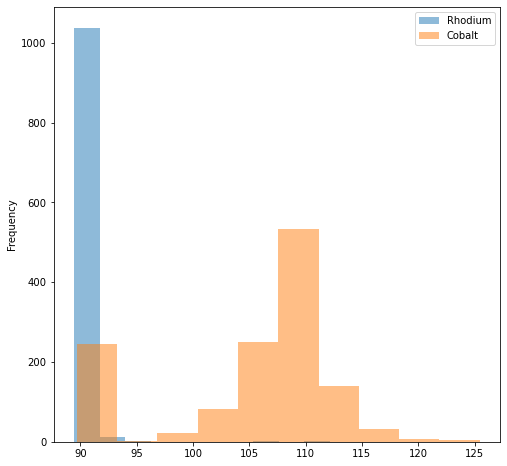

In [37]:
fig, ax = plt.subplots()
df_Rh.plot.hist(y="Mean", ax=ax, label="Rhodium", alpha = 0.5, figsize=(8, 8))
df_Co.plot.hist(y="Mean", ax=ax, label="Cobalt" , alpha = 0.5)

#Set y-values to be the mean
#Histogram ploted
#figure size enlargened to (11,11)


#histogram to compare ( x axis being angle ; y axis is the frequency )
#scatterplot ( average angle and r factor and study temp )

For Rhodium, around 97% of the mean is centred around 90 degrees, which means that most of them are going to be square planars. 

However, Cobalt is quite spread out from 109 (Tetrahedral shape) , with some of the data being at 90 degrees. So, the range for the mean for Cobalt is larger. 

<AxesSubplot:xlabel='Mean', ylabel='R-factor'>

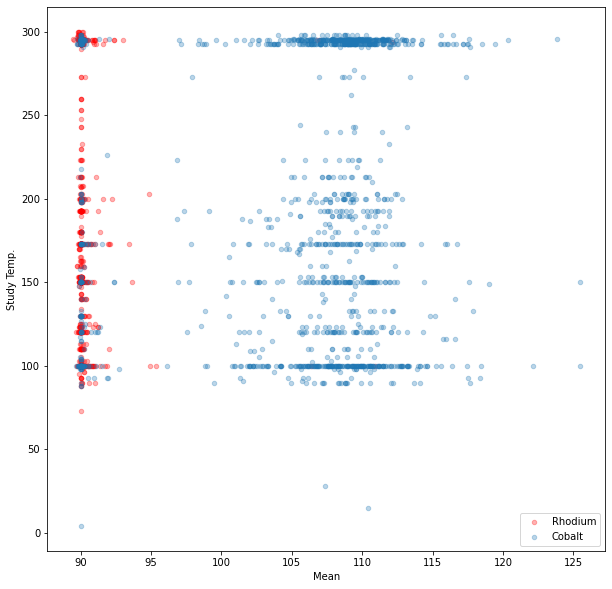

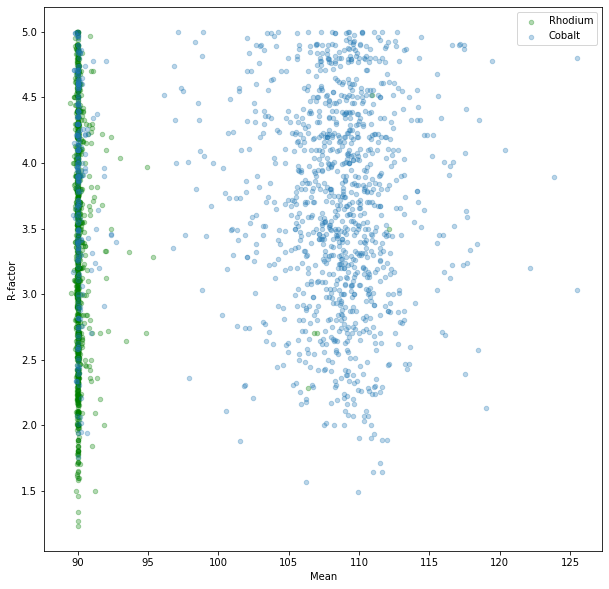

In [50]:

fig, ax = plt.subplots()
df_Rh.plot.scatter(x="Mean",y="Study Temp.", ax=ax, label="Rhodium", color="red" , alpha = 0.3, figsize=(10, 10))
df_Co.plot.scatter(x="Mean",y="Study Temp.", ax=ax, label="Cobalt" , alpha = 0.3)

fig, ax = plt.subplots()
df_Rh.plot.scatter(x="Mean",y="R-factor", ax=ax, label="Rhodium", color="green" , alpha = 0.3, figsize=(10, 10))
df_Co.plot.scatter(x="Mean",y="R-factor", ax=ax, label="Cobalt" , alpha = 0.3)

#Set y-values to be the mean
#Scatter plot plotted
#Colour used to distinguish between Rhodium and Cobalt

From the graphs, The R-factor and the Study Temp. does not really affect the general position of the angle. 

In [38]:
filter_df_Rh = df_Rh.loc[["YIQQUK"]] #used .loc to isolate certian molecules

filter_df_Rh

,Query,ANG1,ANG2,ANG3,ANG4,R-factor,Study Temp.,Mean,Standard Deviation
Refcode,,,,,,,,,
YIQQUK,1,89.407,90.511,91.372,88.691,3.08,296.0,89.99525,1.184419


The molecule YIQQUK has a high likelihood to be a square planar because the mean is close to 90 degrees. Also, the SD is quite low ( 1.1.84419 ) , meaning it is not really dispersed from the mean of 89.9.

In [39]:
filter_df_Co = df_Co.loc[["ZOJPUJ01","ICAYES","ZABVIK"]] #used .loc to isolate certian molecules

filter_df_Co

,Query,ANG1,ANG2,ANG3,ANG4,R-factor,Study Temp.,Mean,Standard Deviation
Refcode,,,,,,,,,
ZOJPUJ01,2,97.016,107.569,97.501,106.162,4.95,100.0,102.06200,5.579782
ICAYES,2,116.386,109.928,113.829,104.237,2.24,100.0,111.09500,5.287201
ZABVIK,2,96.312,86.190,82.377,95.208,3.48,130.0,90.02175,6.821264


ZOJPUJ01 has a mean of 102.06200 and a SD of 5.579782. This molecule is very unlikely it for it to have a Tetrahedral Shape because the mean value is far from 109.5. 
The data is quite dispersed from the mean of 102, meaning data may go below 100, which is far from 109.5 degrees. 

ICAYES has a mean of 111.09500 and a SD of 5.287201. This molecule is unlikely to have a Tetrahedral Shape. The mean is closer to 109.5 but is still susceptible to have an angle far from 109.5 as it still has a 5.287 SD. 

ZABVIK has a mean of 90.02175 and a SD OF 6.281264. This molecule is moderately likely to have a SQUARE planar. The mean is very spot on to have 90 degrees with SD only being 6.

Coefficient of Variation is often abbrieviated as CV. 
A way to specify how values are spread out from the mean. In this case, I will consider a CV of more than 0.08 as high.

```
CV = Standard Deviation / Mean 
```

In [ ]:
df_Co['Likely To be Square Planar?'] = np.where((abs(df_Co["Mean"] - 90)<3) & (df_Co["Standard Deviation"]/df_Co["Mean"] <=0.08) , True, False)
#two conditions are set for "likely to be square planar?"
# 1) The difference of the mean must not be more than 3 from the ideal value of 90 
# 2) The CV value must not be not more than 0.08
# If thtese two conditions satisfy, then value set as "TRUE"

pd.set_option("display.max_rows", None, "display.max_columns", None) #Code to display the whole Data Set
print(df_Co)

This aligns with my predictions. 
```
ZOJPUJ01 shows false
ICAYES shows false
ZABVIK shows true, indicating it is likely to be a square planar. 
```